### Import relevant packages 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
#Loading the dataset
toyota_data = pd.read_csv('ToyotaCorolla.csv', encoding = "ISO-8859-1")
toyota_data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
#Selecting the desired columns
toyota_data = toyota_data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyota_data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [4]:
#check for collinearity between input variables
toyota_data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


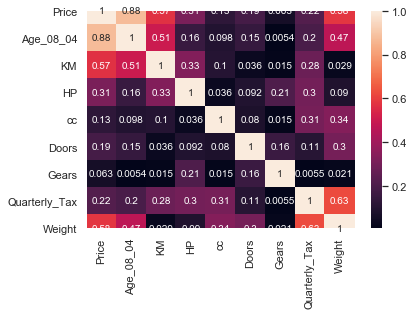

In [5]:
import matplotlib.pyplot as plt
corrMatrix = toyota_data.corr().abs()
sns.heatmap(corrMatrix,annot=True)
plt.show()

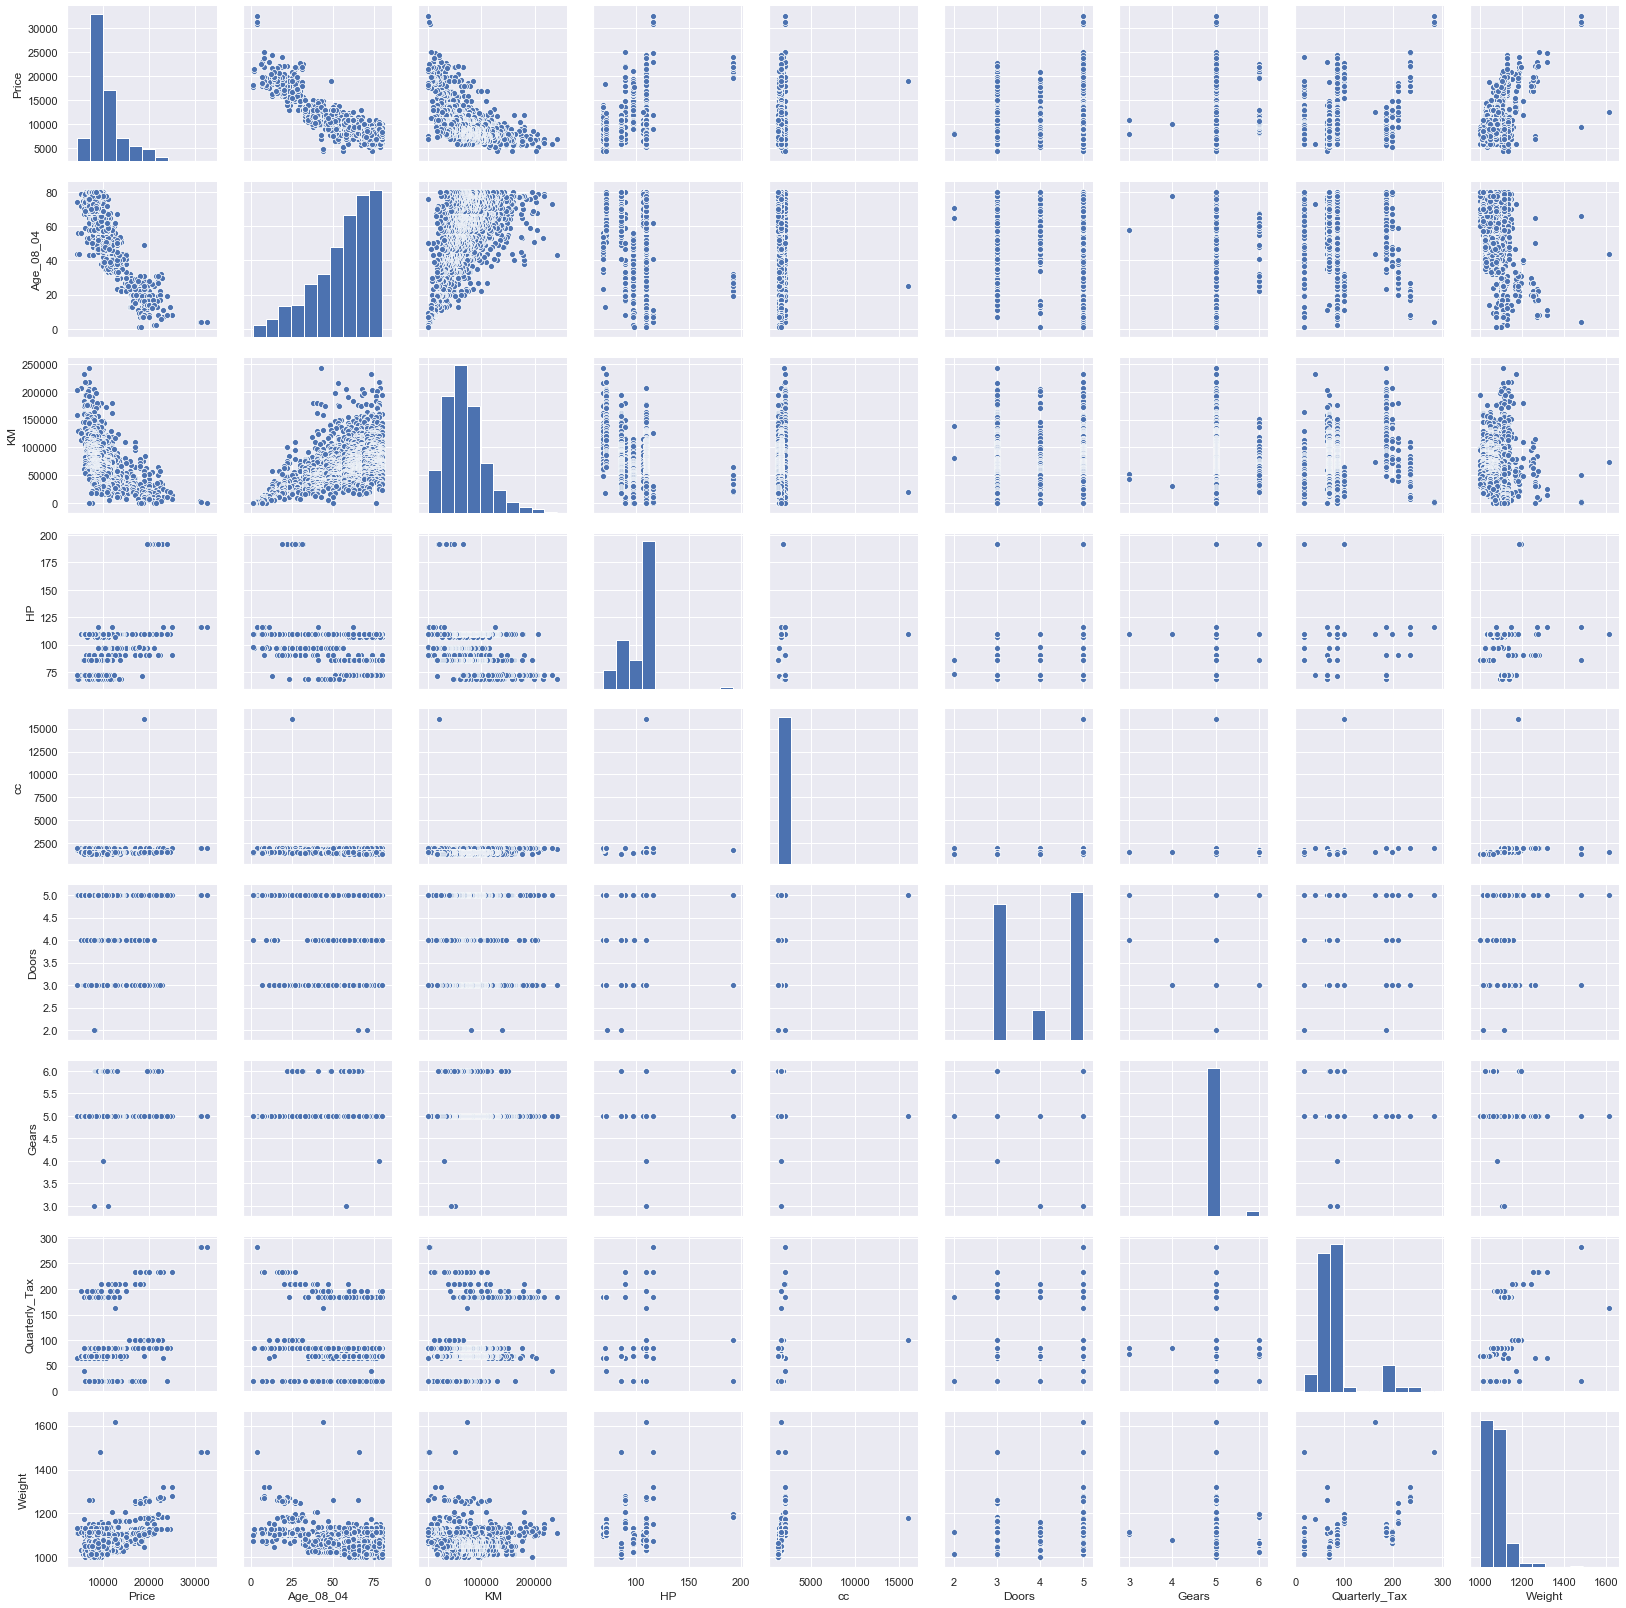

In [21]:
sns.pairplot(toyota_data)
plt.show()

In [6]:
toyota_data.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [7]:
#Preparing model
ml1 = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Doors+Quarterly_Tax+Weight',data=toyota_data).fit()
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 14 May 2020   Prob (F-statistic):               0.00
Time:                        17:19:41   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

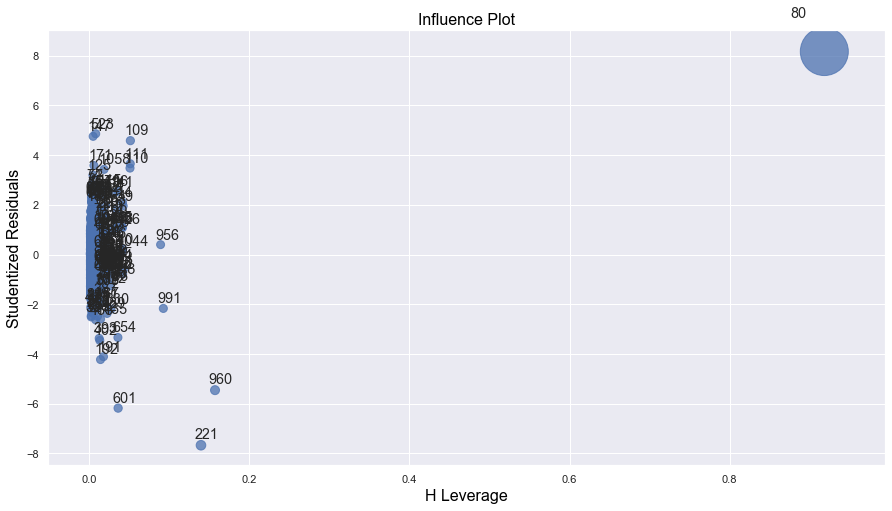

In [8]:
#plt.subplots(figsize=(7, 4))
#sm.graphics.influence_plot(ml1,alpha=0.05, criterion='cooks', size=50, plot_alpha=0.25)


fig, ax = plt.subplots(figsize=(15,8))
fig = sm.graphics.influence_plot(ml1, ax=ax, criterion="cooks")
plt.show()

In [9]:
toyota_data_new = toyota_data.drop(index=[80],axis=0)
toyota_data_new.drop(['Doors'],inplace=True,axis=1)

In [10]:
ml2 = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=toyota_data_new).fit()
ml2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1356.
Date:                Thu, 14 May 2020   Prob (F-statistic):               0.00
Time:                        17:19:42   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1427   BIC:                         2.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6313.9396   1381.857     -4.569      0.000   -9024.628   -3603.251
Age_08_04      -120.4577      2.561    -47.031      0.000    -125.482    -115.433
KM               -0.0179      0.001    -14.029      0.000      -0.020      -0.015
HP               39.1593      2.898     13.512      0.000      33.474      44.844
cc               -2.5069      0.306     -8.188      0.000      -3.107      -1.906
Gears           549.7311    189.216      2.905      0.004     178.561     920.902
Quarterly_Tax     9.0759      1.424      6.374      0.000       6.283      11.869
Weight           19.9623      1.076     18.547      0.000      17.851      22.074
==============================================================================
Omnibus:                      239.713   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2556.740
Skew:                          -0.425   Prob(JB):                         0.00
Kurtosis:                       9.484   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
ml2_pred = ml2.predict(toyota_data_new)
ml2_pred

0       16496.007474
1       16031.645211
2       16469.939626
3       16116.490065
4       15904.461841
            ...     
1431     8951.852309
1432     8418.484540
1433     8574.443555
1434     8696.690631
1435     9986.846541
Length: 1435, dtype: float64

In [13]:
toyota_data_new = toyota_data_new[['Age_08_04','KM','HP','cc','Gears','Quarterly_Tax','Weight','Price']]
toyota_data_new.insert(loc=8, column='Predicted' ,value=ml2_pred)
toyota_data_new.insert(loc=9, column='Residual', value=ml2.resid)
toyota_data_new.head()

,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight,Price,Predicted,Residual
0,23,46986,90,2000,5,210,1165,13500,16496.007474,-2996.007474
1,23,72937,90,2000,5,210,1165,13750,16031.645211,-2281.645211
2,24,41711,90,2000,5,210,1165,13950,16469.939626,-2519.939626
3,26,48000,90,2000,5,210,1165,14950,16116.490065,-1166.490065
4,30,38500,90,2000,5,210,1170,13750,15904.461841,-2154.461841


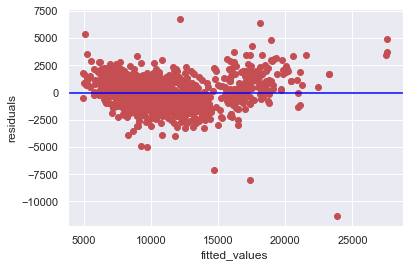

In [14]:
# Residuals VS Fitted Values 
plt.scatter(ml2_pred,ml2.resid,c="r")
plt.axhline(y=0,color='blue')
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()

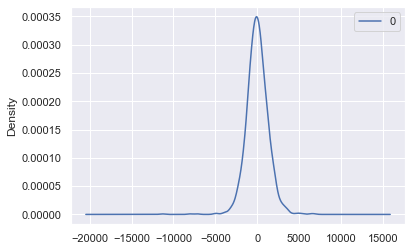

In [15]:
df=pd.DataFrame(ml2.resid)
df.plot.density()
plt.show()

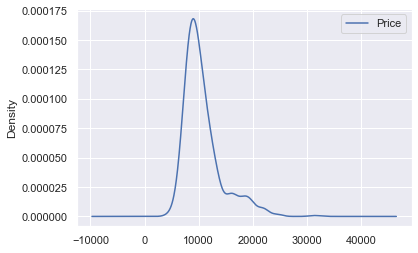

In [16]:
dfPrice = pd.DataFrame(toyota_data_new['Price'])
dfPrice.plot.density()
plt.show()

In [17]:
#Dividing data into Training and testing data
from sklearn.model_selection import train_test_split

toyota_train, toyota_test = train_test_split(toyota_data_new, test_size = 0.2)

model_train = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=toyota_train).fit()

train_predict = model_train.predict(toyota_train)

train_residual = train_predict - toyota_train.Price

toyota_train.head(10)

,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight,Price,Predicted,Residual
566,55,36406,110,1600,5,69,1035,10995,10741.810966,253.189034
1069,69,155000,72,2000,5,185,1115,7950,7092.293038,857.706962
589,55,27500,97,1400,5,69,1025,9950,10693.855068,-743.855068
792,68,74875,110,1600,5,85,1070,7750,9331.398374,-1581.398374
702,63,94504,86,1300,5,69,1000,8250,7852.115481,397.884519
805,58,73172,110,1600,5,85,1075,9500,10666.259848,-1166.259848
516,55,52141,110,1600,5,85,1070,11950,11304.146288,645.853712
82,25,17003,97,1400,5,85,1110,15450,16337.425299,-887.425299
237,35,59500,69,1900,5,64,1110,13950,11831.924282,2118.075718
826,58,69022,86,1300,5,69,1035,6950,9609.053562,-2659.053562


In [18]:
#rmse value for training data
train_rmse = np.sqrt(np.mean(train_residual*train_residual))
train_rmse

1322.3115836275679

In [19]:
test_predict = model_train.predict(toyota_test)

test_residual = test_predict - toyota_test.Price

toyota_test.head(10)

,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight,Price,Predicted,Residual
1243,76,81930,110,1600,5,85,1070,7750,8241.495983,-491.495983
1154,80,100123,110,1600,5,69,1050,6490,6889.662783,-399.662783
44,22,100250,90,2000,5,234,1255,16950,17677.796130,-727.796130
1431,69,20544,86,1300,5,69,1025,7500,8951.852309,-1451.852309
795,62,74457,110,1600,5,85,1075,8950,10161.435521,-1211.435521
50,22,62636,90,2000,5,234,1255,17950,18350.853898,-400.853898
699,68,95000,110,1600,5,69,1050,8950,8426.825114,523.174886
370,39,18500,110,1600,5,69,1030,10250,12889.729288,-2639.729288
1089,77,128960,110,1600,5,85,1070,7250,7279.492405,-29.492405
436,47,78785,110,1600,5,197,1119,11500,13785.700714,-2285.700714


In [20]:
#rmse value for test data
test_rmse = np.sqrt(np.mean(test_residual*test_residual))
test_rmse

1257.02840016596